In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("dataset_prediction.csv", index_col=0)
df['foyer'] = df['foyer'].astype(str)
df["departement"] = df['departement'].astype(str)
df.dropna(subset='target_2_boutique_local', inplace=True)

# target_1_produit_pref : chocolat, gateaux basque ou autre

features potentielle : âge, foyer, client, Boutique, ancienneté, fréquence


# target_2_boutique_local: oui/non

df_touriste

features potentielle : département, frequence, ancienneté, age

In [4]:
def make_simple_pipeline(model=LinearRegression(), cat_transformer=OneHotEncoder(handle_unknown='ignore'), num_encoder=MinMaxScaler()):
    num_transformer = make_pipeline(SimpleImputer(strategy='median'),num_encoder)
    numerical_features = make_column_selector(dtype_include = np.number)
    cat_features = make_column_selector(dtype_exclude = np.number)
    preprocessing_transformer = ColumnTransformer([('num columns',num_transformer, numerical_features),('cat columns',cat_transformer, cat_features)])
    pipeline_workflow = make_pipeline(preprocessing_transformer, model)
    return pipeline_workflow

df = df[df['client'] == 'touriste']
y = df['target_2_boutique_local']
X = df[['anciennete', 'frequence']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = make_simple_pipeline(model=LogisticRegression(random_state=5))
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred, normalize="pred")
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[0.625 0.25 ]
 [0.375 0.75 ]]
              precision    recall  f1-score   support

         Non       0.62      0.24      0.34        21
         oui       0.75      0.94      0.83        51

    accuracy                           0.74        72
   macro avg       0.69      0.59      0.59        72
weighted avg       0.71      0.74      0.69        72



<AxesSubplot: >

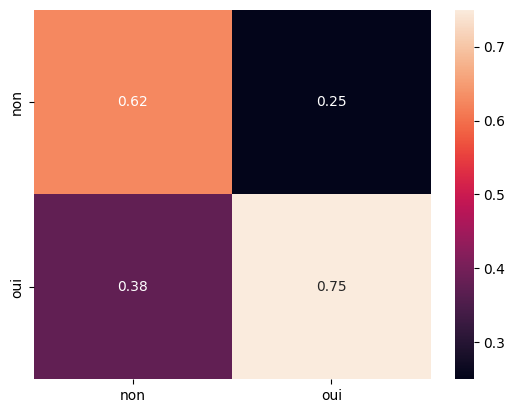

In [12]:
label=['non','oui']
sns.heatmap(cm, annot=True,yticklabels=label, xticklabels=label)

#J'ai réussi à prédire correctement 62% des Oui => Vrai Negatif
#Je n'ai pas rréussi à prédire correctement 38% des Oui => Vrai Negatif
#J'ai réussi à prédire correctement 75% des Non => Vrai Positif
#Je n'ai pas réussi à prédire correctement 25% des Oui => Vrai Positif

In [80]:
print(pd.DataFrame(y_pred)[0].value_counts())

#rajouter des features, tester model, hyperparametre

oui    64
Non     8
Name: 0, dtype: int64


In [81]:
y_test.value_counts()

oui    51
Non    21
Name: target_2_boutique_local, dtype: int64

In [85]:
model.n_iter_

AttributeError: 'Pipeline' object has no attribute 'n_iter_'

In [8]:
df.client.unique()

array(['touriste'], dtype=object)